In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df1=pd.read_csv('D:\p\diabetes.csv')

In [66]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df1.shape

(768, 9)

In [68]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

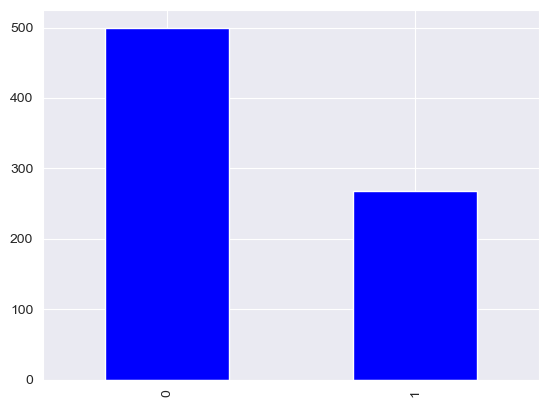

In [70]:
df1['Outcome'].value_counts().plot.bar(color='blue')

<Axes: >

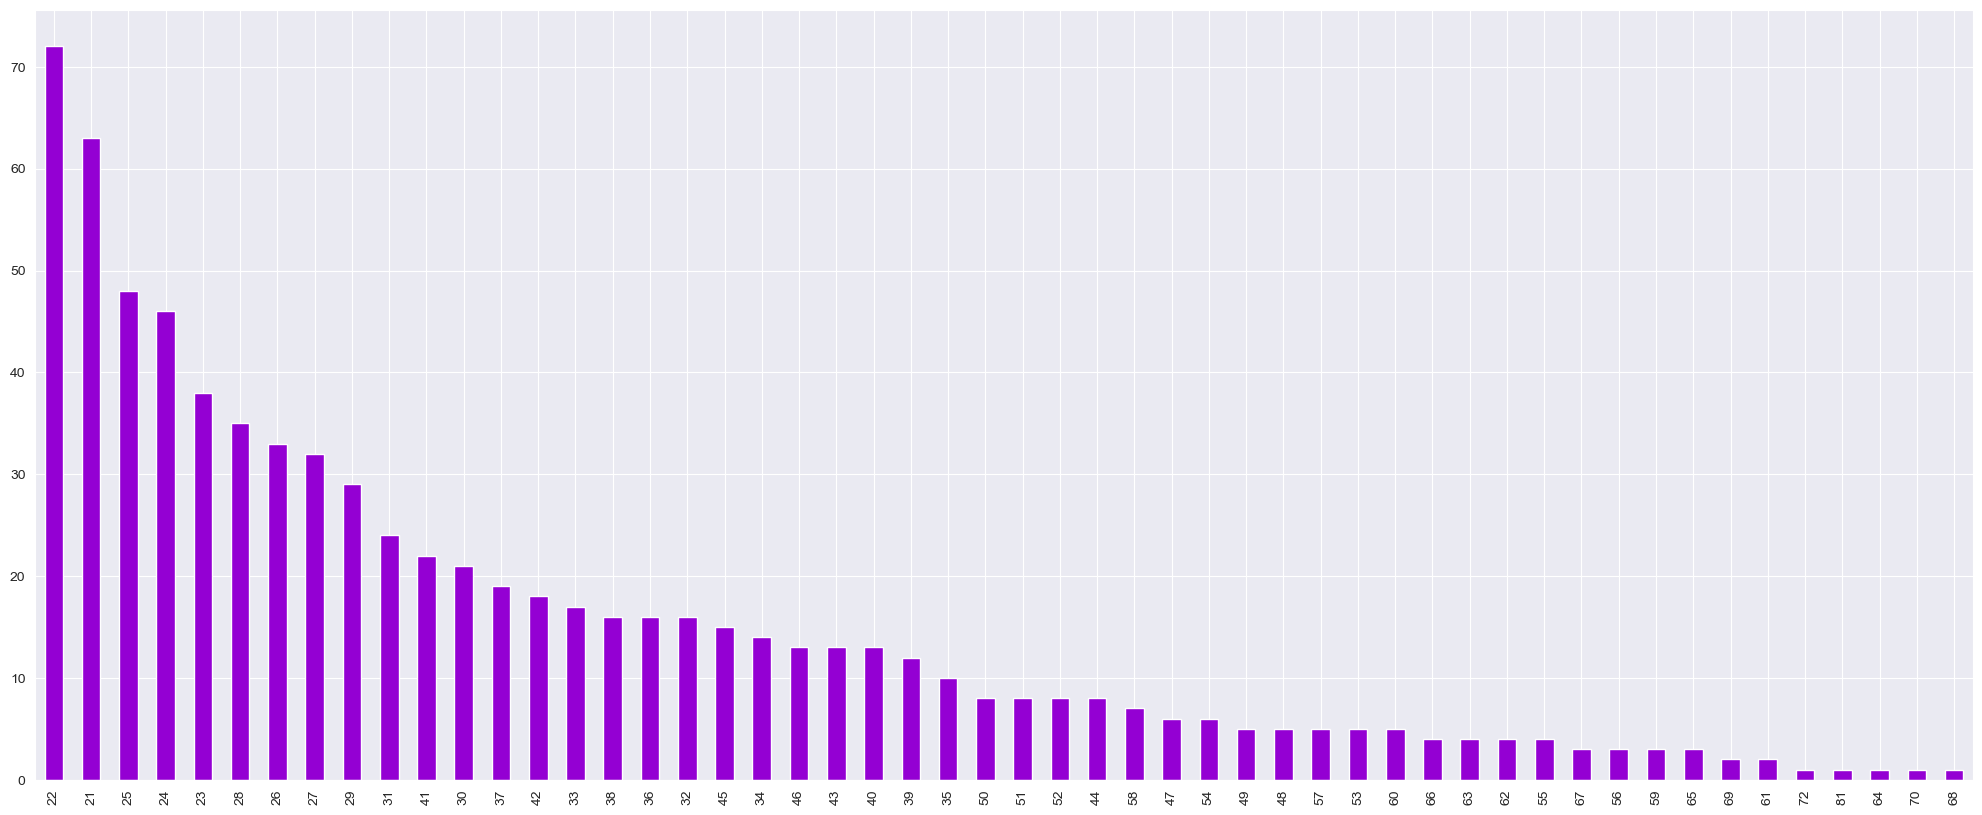

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df1['Age'].value_counts().plot.bar(color='darkviolet')

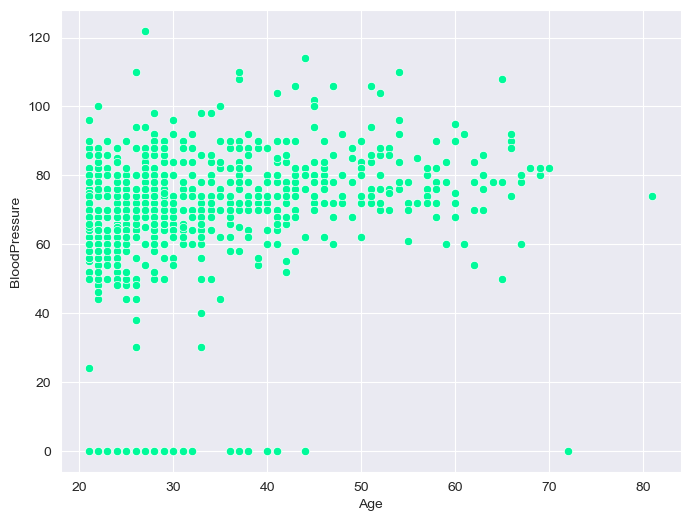

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Age", y="BloodPressure",color='mediumspringgreen',data=df1);
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [76]:
y=['Output']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis=1),df1['Outcome'],test_size=0.20,random_state=101)

In [78]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


In [79]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [80]:
predictions_diabetes=LRModel.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions_diabetes)
print(confusion_matrix)

[[89 14]
 [18 33]]


In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [83]:
x=df1.drop(['Outcome'],axis=1)
y=df1['Outcome']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [88]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
predicted_labels=KNN.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predicted_labels)
print(confusion_matrix)

[[128  18]
 [ 35  50]]


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [31]:
# paitentid_54=pd.DataFrame([1,85,66,29,0,26.6,0.351,31],columns=x)
#Defining a sample data to test the model
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[1,85,66,29,0,26.6,0.351,31]
paitentid_1=pd.DataFrame([data],columns=x)
paitentid_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31


In [32]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
predictions_diabetes=LRModel.predict(paitentid_1)

In [34]:
print(predictions_diabetes)

[0]


In [35]:
predicted_labels=KNN.predict(paitentid_1)

In [41]:
print(predicted_labels)

[0]
